# K-means CLustering

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from DataMatrix import generate_data_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import pairwise_distances
import math as m
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
)


## Generating Data Matrix

In [2]:
X_train, y_train, X_test, y_test = generate_data_matrix()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7296, 45)
(7296,)
(1824, 45)
(1824,)


## Helper Methods

In [3]:
def eucldiean_dist(X,Y):
   return np.linalg.norm(X-Y)
def calculate_new_centroids(dict, current_centroids, k):
    if len(dict) == 0:
        return 
    
    lists = [[] for _ in range(k)]
    for key, value in dict.items():
        lists[value-1].append(key)

    for i in range(k):
        if len(lists[i])!=0:  # Check if lists[i] exists and is not empty
            current_centroids[i] = [sum(x) / len(lists[i]) for x in zip(*lists[i])]
        # If the list associated with a centroid is empty or doesn't exist, keep the centroid unchanged.




## K-means Implementation

In [4]:
def kmeans(k,current_centroids):
   dict={}
   for x in range(1000): 
      calculate_new_centroids(dict,current_centroids,k) 
      found=False
      for i in range(len(X_train)):
            min_dist=99999
            cluster=0
            for j in range (k):
               dist=eucldiean_dist(X_train[i],current_centroids[j])
               if dist<min_dist:
                  min_dist=dist
                  cluster=j+1
            if  not tuple(X_train[i]) in dict:
               found=True
            elif dict[tuple(X_train[i])]!=cluster:
               found=True
            dict[tuple(X_train[i])]=cluster
      if(not found):
         break
   labels=[]
   for _,value in dict.items():
      labels.append(value) 
   return labels,current_centroids   

## Choosing The Best K By Taking The ELbow Point

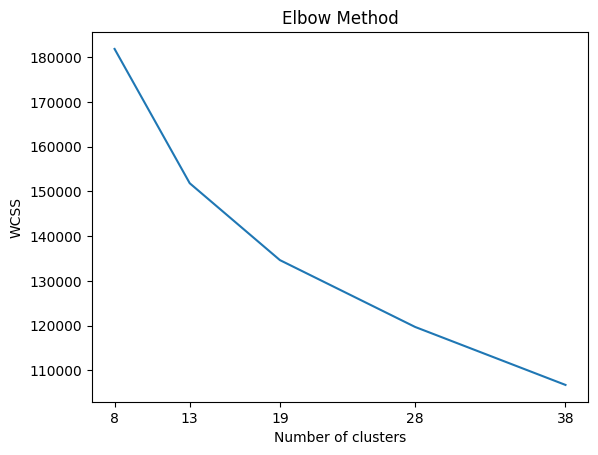

In [48]:
def calculate_wcss(indices,centroid):
    wcss=0
    for index in indices:
        wcss+=m.pow(eucldiean_dist(X_train[index],centroid),2)
    return wcss

k_s=[8,13,19,28,38]
results=[]
for k in k_s:
    initial_centroids = X_train[np.random.choice(X_train.shape[0], k, replace=False)]
    labels,centroids=kmeans(k,initial_centroids)
    lists = [[] for _ in range(k)]
    for i in range(len(labels)):
        lists[labels[i]-1].append(i)
    WCCS=0    
    for j in range(len(lists)):
        WCCS+=calculate_wcss(lists[j],centroids[j])
    results.append([k,WCCS])

results=pd.DataFrame(results,columns=['k','WCCS'])
results
plt.plot(results['k'],results['WCCS'])
plt.xlabel('Number of clusters')
plt.xticks(k_s)
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()
        


There is no elbow point so i will use Silhouette method

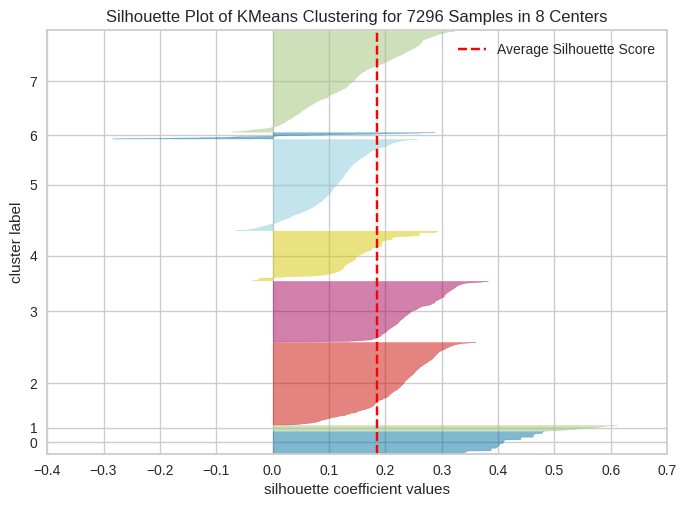

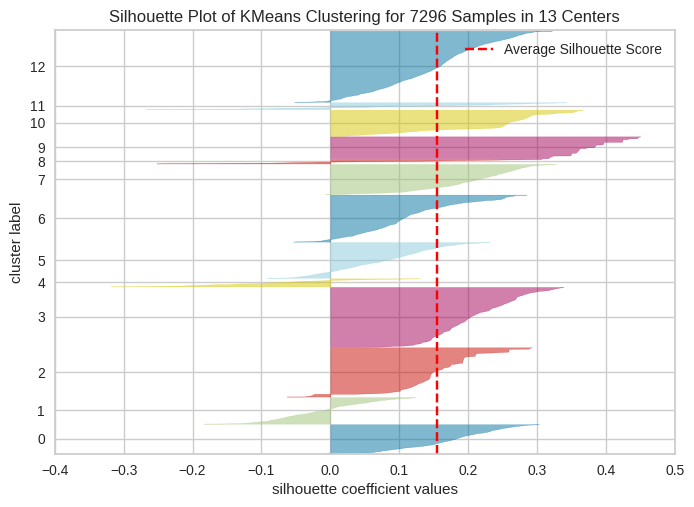

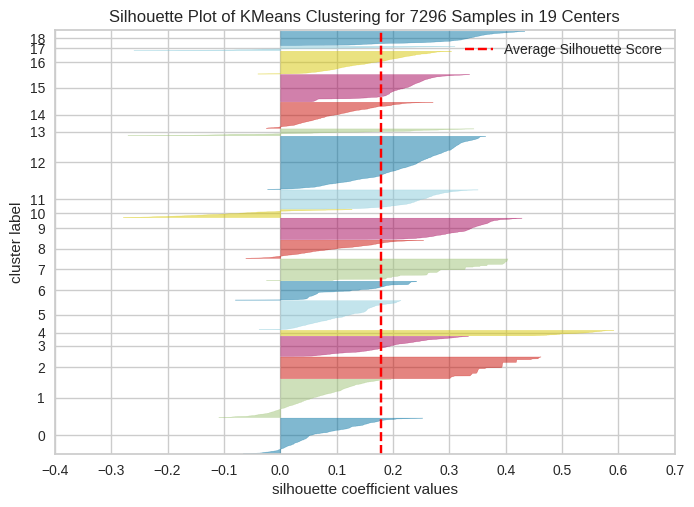

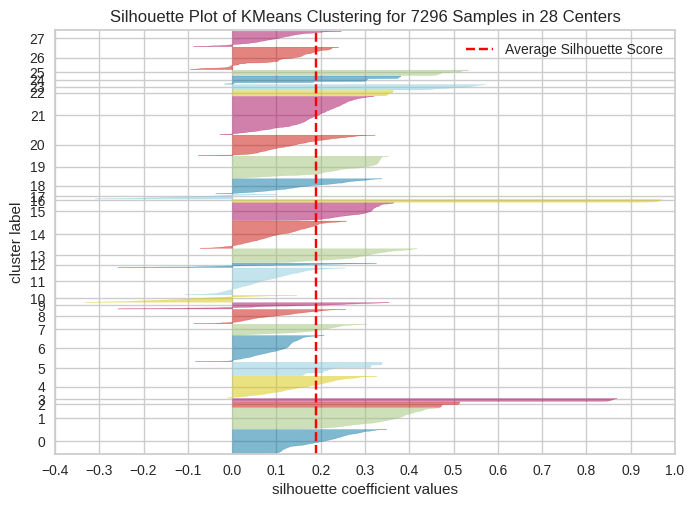

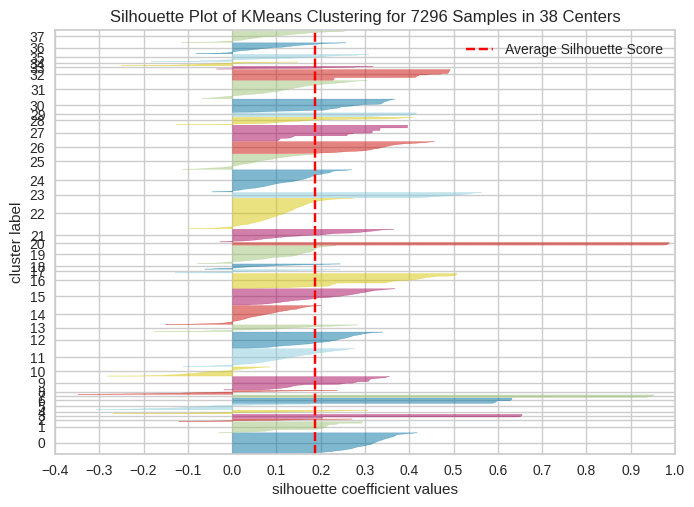

In [53]:
for k in k_s:
    initial_centroids = X_train[np.random.choice(X_train.shape[0], k, replace=False)]
    k_labels,centroids=kmeans(k,initial_centroids)
    kmeans_model = KMeans(n_clusters=k, init=centroids, n_init=1)
    visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
    visualizer.fit(X_train)
    visualizer.show()

k = 19 is the best k

## Evaluation

### Classifying Test Data By K-means centroids

In [22]:
def nearest_centroid(x,centroids):
    min_dist=99999
    cluster=0
    for j in range (len(centroids)):
        dist=eucldiean_dist(x,centroids[j])
        if dist<min_dist:
            min_dist=dist
            cluster=j+1
    return cluster
def classify_test_set(k):
    initial_centroids = X_train[np.random.choice(X_train.shape[0], k, replace=False)]
    labels,centroids=kmeans(k,initial_centroids)
    y_pred=[]
    for x in X_test:
        y_pred.append(nearest_centroid(x,centroids))
    return y_pred 
y_predicted=classify_test_set(13)

### Mapping points in each cluster to its ground truth

In [23]:
def mapping(k,y_pred,y_actual):
    clusters=[[] for _ in range(k)]
    for i in range(len(y_pred)):
        clusters[y_pred[i]-1].append(y_actual[i])
    return clusters
clusters=mapping(13,y_predicted,y_test)
print(clusters) 

[[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0], [16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 